# Flight Delay Prediction 



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support


In [2]:
df = pd.read_csv('flightDelayData1.csv')
df.head()

,Year,Month,DayOfMonth,DayOfWeek,Carrier,OriginAirportID,DestinationAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDel,ArrDel15,Cancelled
0,2013,4,19,5,DL,14057,14869,600,-4.0,0.0,851,-15.0,0,0
1,2013,4,19,5,DL,15016,11433,1630,28.0,1.0,1903,24.0,1,0
2,2013,4,19,5,DL,11193,12892,1615,-6.0,0.0,1805,-11.0,0,0
3,2013,4,19,5,DL,10397,15016,1726,-1.0,0.0,1818,-19.0,0,0
4,2013,4,19,5,DL,15016,10397,1900,0.0,0.0,2133,-1.0,0,0


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849041 entries, 0 to 849040
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Year                  849041 non-null  int64  
 1   Month                 849041 non-null  int64  
 2   DayOfMonth            849041 non-null  int64  
 3   DayOfWeek             849041 non-null  int64  
 4   Carrier               849041 non-null  object 
 5   OriginAirportID       849041 non-null  int64  
 6   DestinationAirportID  849041 non-null  int64  
 7   CRSDepTime            849041 non-null  int64  
 8   DepDelay              838935 non-null  float64
 9   DepDel15              838935 non-null  float64
 10  CRSArrTime            849041 non-null  int64  
 11  ArrDel                838436 non-null  float64
 12  ArrDel15              849041 non-null  int64  
 13  Cancelled             849041 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 90

# Exploratory Data Analysis

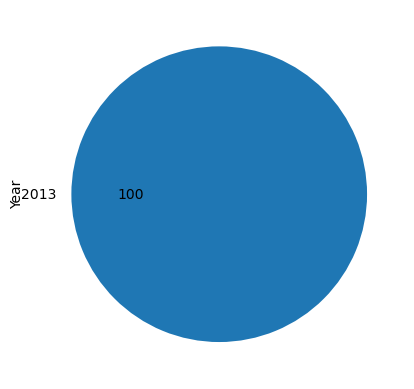

In [4]:
df['Year'].value_counts().plot(kind='pie', autopct='%.0f')
plt.show()

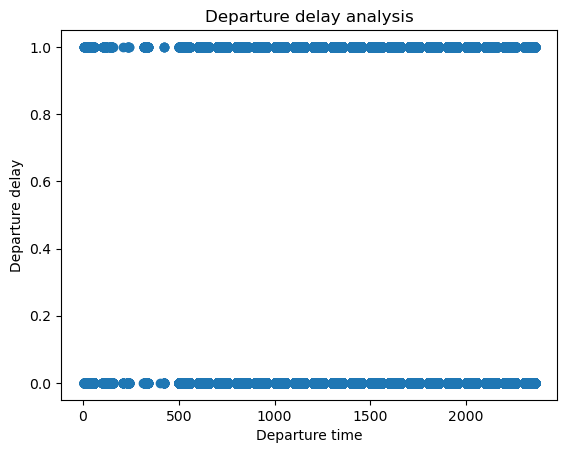

In [5]:
plt.scatter(df.CRSDepTime, df.DepDel15)
plt.title('Departure delay analysis')
plt.xlabel('Departure time')
plt.ylabel('Departure delay')
plt.show()

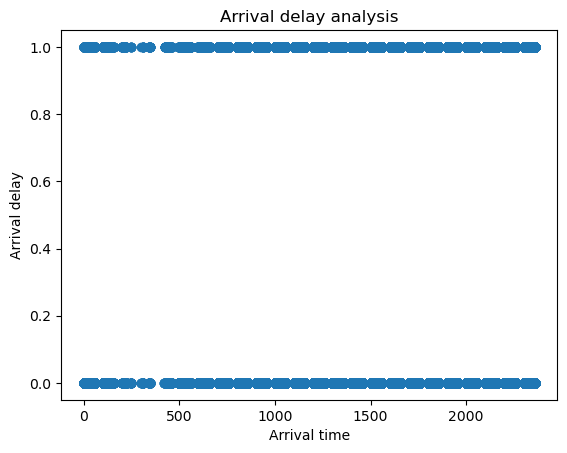

In [6]:
plt.scatter(df.CRSArrTime, df.ArrDel15)
plt.title('Arrival delay analysis')
plt.xlabel('Arrival time')
plt.ylabel('Arrival delay')
plt.show()


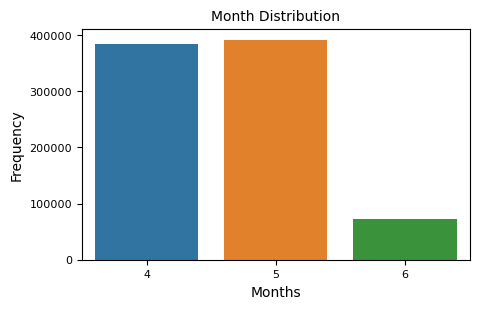

In [7]:
plt.figure(figsize = (5,3))
sns.countplot(data=df, x='Month')
plt.title('Month Distribution', size=10)
plt.xticks(size=8)
plt.yticks(size=8)
plt.xlabel("Months", size=10)
plt.ylabel("Frequency", size=10)
plt.show()


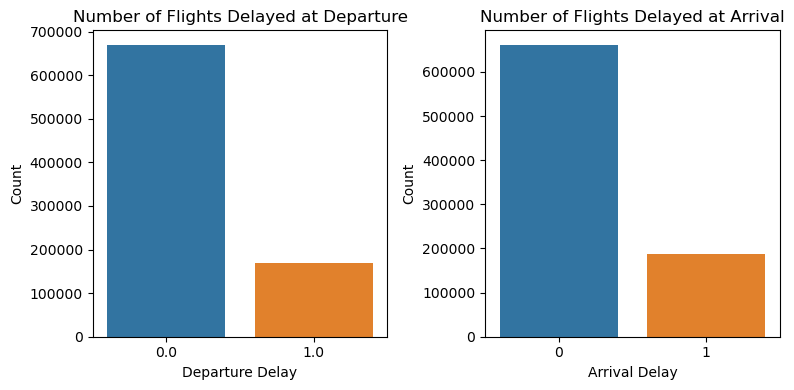

In [8]:

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
# Plot the count of flights delayed at departure
sns.countplot(data=df, x='DepDel15', ax=axes[0])
axes[0].set_title('Number of Flights Delayed at Departure')
axes[0].set_xlabel('Departure Delay')
axes[0].set_ylabel('Count')
# Plot the count of flights delayed at arrival
sns.countplot(data=df, x='ArrDel15', ax=axes[1])
axes[1].set_title('Number of Flights Delayed at Arrival')
axes[1].set_xlabel('Arrival Delay')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()


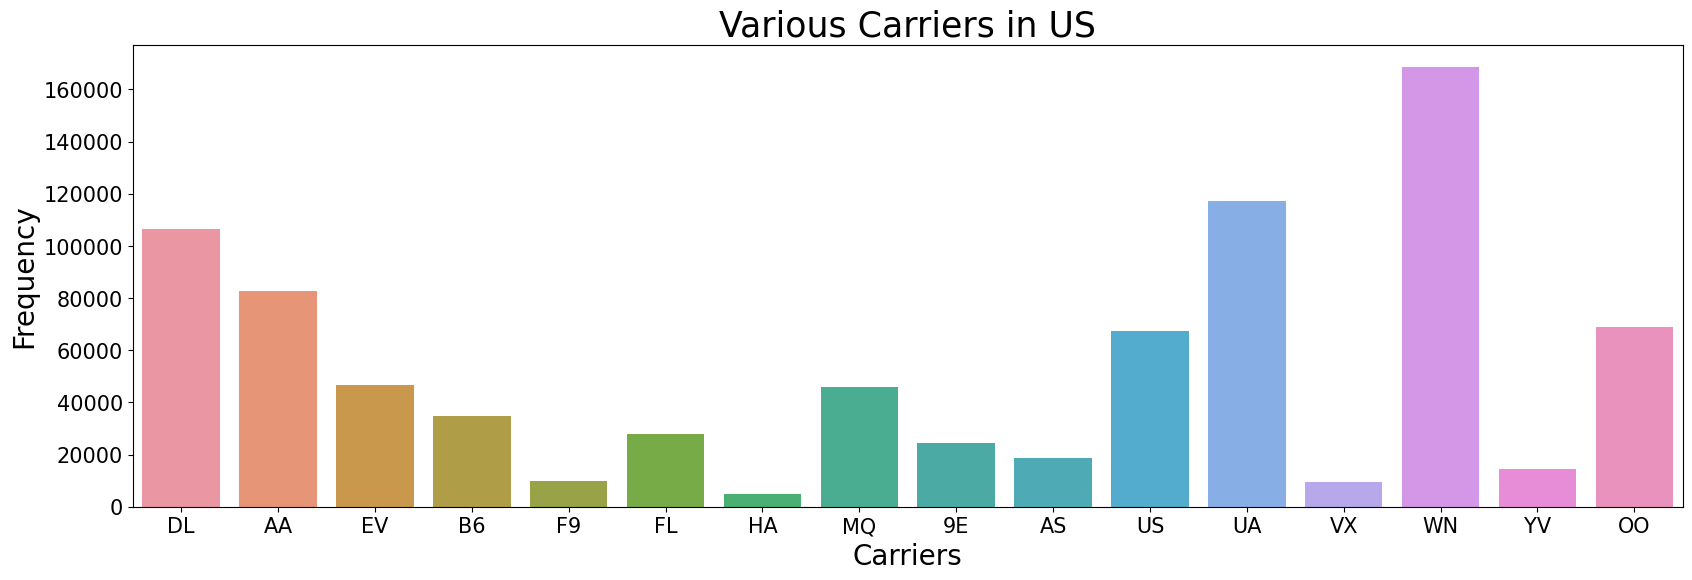

In [9]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Carrier', data=df)
plt.title('Various Carriers in US', size=25)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel("Carriers", size=20)
plt.ylabel("Frequency", size=20)
plt.show()

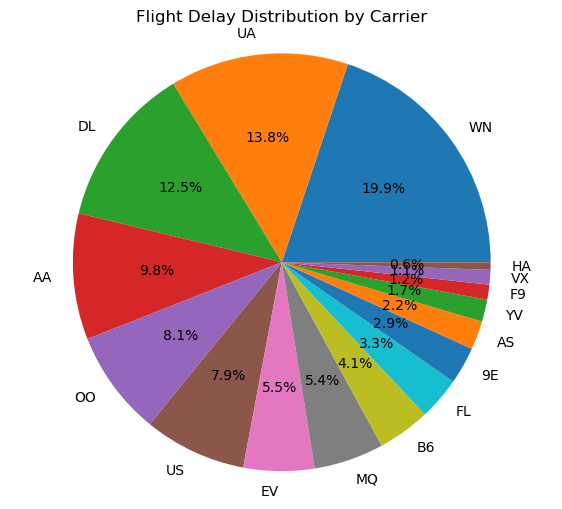

In [10]:
# Calculate the frequency of each carrier
carrier_counts = df['Carrier'].value_counts()

# Plot the pie chart
plt.figure(figsize=(7, 6))
plt.pie(carrier_counts, labels=carrier_counts.index, autopct='%1.1f%%')
plt.title('Flight Delay Distribution by Carrier')
plt.axis('equal')
plt.show()


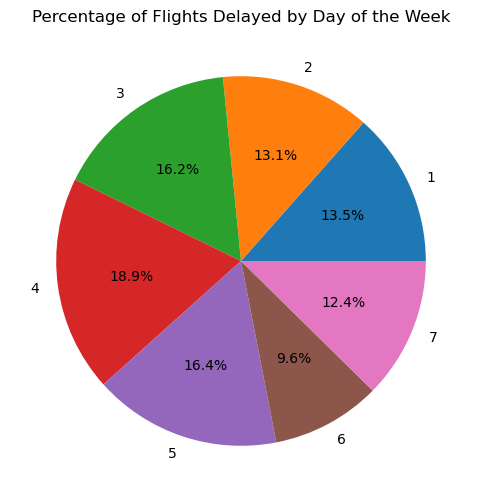

In [11]:
# Group the data by day of the week and calculate the total number of flights and the number of delayed flights
grouped_data = df.groupby('DayOfWeek')['ArrDel15'].agg(['count', 'sum'])

# Calculate the percentage of flights delayed for each day
grouped_data['Percentage Delayed'] = (grouped_data['sum'] / grouped_data['count']) * 100

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(grouped_data['Percentage Delayed'], labels=grouped_data.index, autopct='%1.1f%%')
plt.title('Percentage of Flights Delayed by Day of the Week')
plt.show()


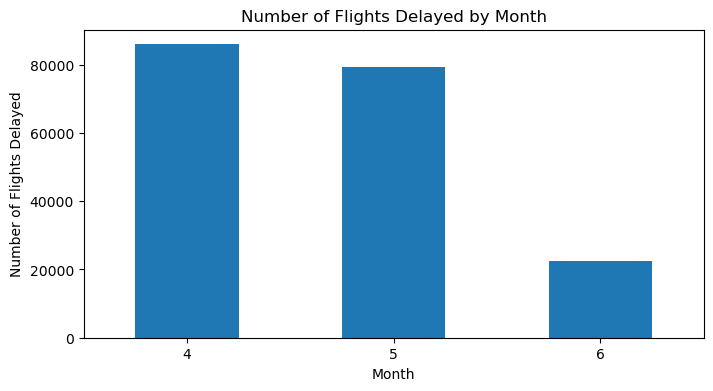

In [12]:
# Group the data by month and calculate the total number of flights delayed
grouped_data = df.groupby('Month')['ArrDel15'].sum()

# Create a bar chart
plt.figure(figsize=(8, 4))
grouped_data.plot(kind='bar')
plt.title('Number of Flights Delayed by Month')
plt.xlabel('Month')
plt.ylabel('Number of Flights Delayed')
plt.xticks(rotation=0)
plt.show()


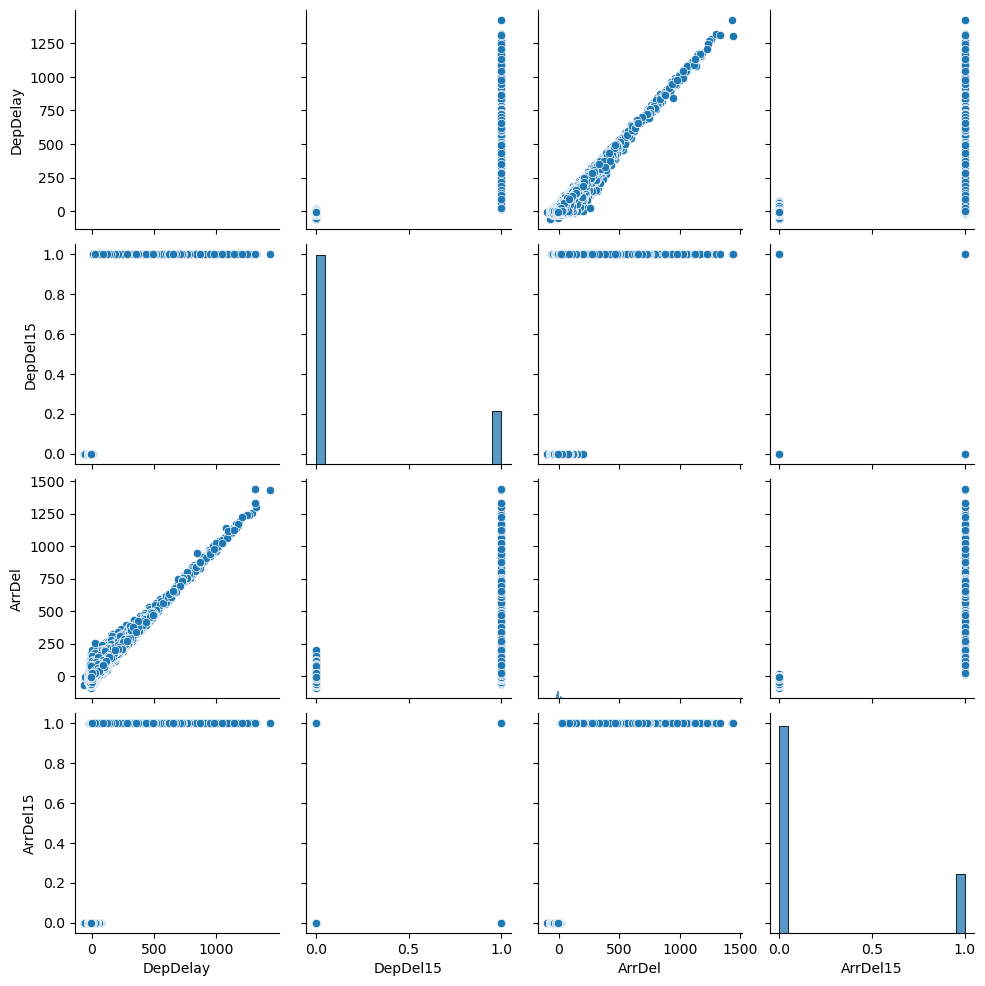

In [14]:
# Select the columns to include in the pairplot
columns = ['DepDelay','DepDel15', 'ArrDel', 'ArrDel15']

# Create a pairplot
sns.pairplot(df[columns])

# Display the plot
plt.show()


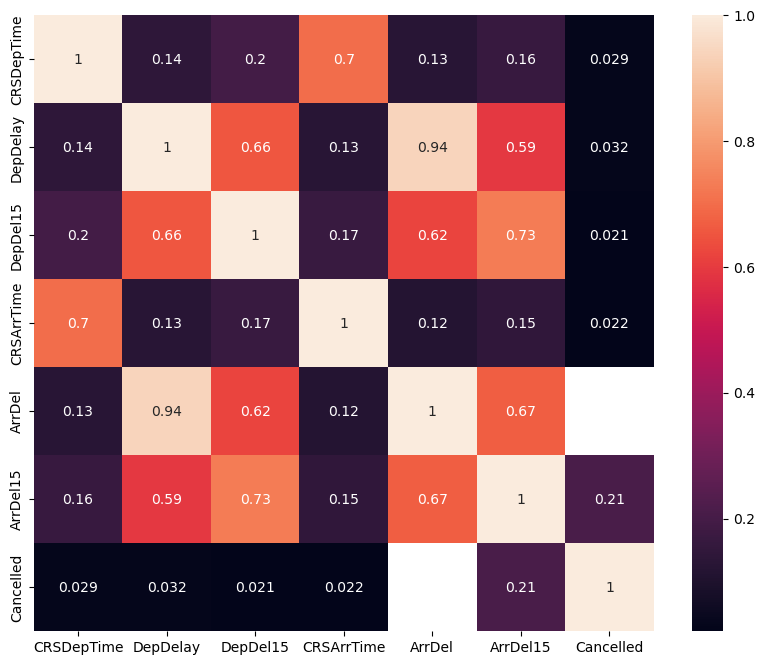

In [16]:
fig, ax = plt.subplots(figsize=(10, 8))
corr_matrix= df.iloc[:, 7:14].corr()
sns.heatmap(corr_matrix, annot=True, ax= ax)
plt.show()


# Performancing Describe Analysis

In [15]:
df.describe()

,Year,Month,DayOfMonth,DayOfWeek,OriginAirportID,DestinationAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDel,ArrDel15,Cancelled
count,849041.0,849041.000000,849041.000000,849041.000000,849041.000000,849041.000000,849041.000000,838935.000000,838935.000000,849041.000000,838436.000000,849041.000000,849041.000000
mean,2013.0,4.634214,15.759071,3.860750,12765.887084,12765.573081,1328.568699,10.845851,0.201937,1504.150161,6.923206,0.221068,0.012491
std,0.0,0.636225,8.783494,1.962858,1493.212890,1493.429950,474.754091,37.346875,0.401446,500.688376,40.123839,0.414967,0.111061
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,5.000000,-60.000000,0.000000,1.000000,-94.000000,0.000000,0.000000
25%,2013.0,4.000000,8.000000,2.000000,11292.000000,11292.000000,920.000000,-4.000000,0.000000,1117.000000,-12.000000,0.000000,0.000000
50%,2013.0,5.000000,16.000000,4.000000,12892.000000,12892.000000,1320.000000,-1.000000,0.000000,1527.000000,-3.000000,0.000000,0.000000
75%,2013.0,5.000000,23.000000,5.000000,14057.000000,14057.000000,1725.000000,9.000000,0.000000,1920.000000,10.000000,0.000000,0.000000
max,2013.0,6.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,1425.000000,1.000000,2359.000000,1440.000000,1.000000,1.000000


In [17]:
df.columns

Index(['Year', 'Month', 'DayOfMonth', 'DayOfWeek', 'Carrier',
       'OriginAirportID', 'DestinationAirportID', 'CRSDepTime', 'DepDelay',
       'DepDel15', 'CRSArrTime', 'ArrDel', 'ArrDel15', 'Cancelled'],
      dtype='object')

# Dropping unnecessary columns

In [18]:
df = df[['Month', 'DayOfMonth', 'DayOfWeek', 'DepDel15', 'CRSArrTime', 'ArrDel15','OriginAirportID', 'DestinationAirportID']]

In [19]:
df

,Month,DayOfMonth,DayOfWeek,DepDel15,CRSArrTime,ArrDel15,OriginAirportID,DestinationAirportID
0,4,19,5,0.0,851,0,14057,14869
1,4,19,5,1.0,1903,1,15016,11433
2,4,19,5,0.0,1805,0,11193,12892
3,4,19,5,0.0,1818,0,10397,15016
4,4,19,5,0.0,2133,0,15016,10397
...,...,...,...,...,...,...,...,...
849036,6,5,3,0.0,1410,1,11618,12892
849037,6,5,3,0.0,2000,0,12892,12173
849038,6,5,3,0.0,1505,0,12892,13930
849039,6,5,3,0.0,1849,0,13930,11278


# Handling Missing values

# Checking for null values

In [20]:
df.isnull().any()

Month                   False
DayOfMonth              False
DayOfWeek               False
DepDel15                 True
CRSArrTime              False
ArrDel15                False
OriginAirportID         False
DestinationAirportID    False
dtype: bool

In [21]:
df.fillna(df['DepDel15'].mode()[0], inplace=True)


In [22]:
df.isnull().any()


Month                   False
DayOfMonth              False
DayOfWeek               False
DepDel15                False
CRSArrTime              False
ArrDel15                False
OriginAirportID         False
DestinationAirportID    False
dtype: bool

# Handling outliers

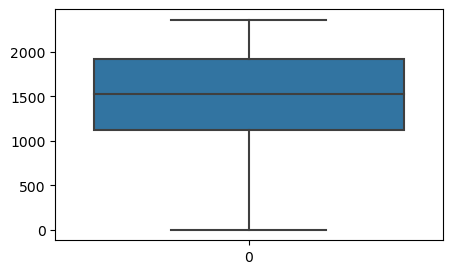

In [23]:
fig, ax= plt.subplots(figsize= (5,3))
sns.boxplot(data = df['CRSArrTime'])
plt.show()

# theres no outliers

In [24]:
df.describe()

,Month,DayOfMonth,DayOfWeek,DepDel15,CRSArrTime,ArrDel15,OriginAirportID,DestinationAirportID
count,849041.000000,849041.000000,849041.000000,849041.000000,849041.000000,849041.000000,849041.000000,849041.000000
mean,4.634214,15.759071,3.860750,0.199533,1504.150161,0.221068,12765.887084,12765.573081
std,0.636225,8.783494,1.962858,0.399650,500.688376,0.414967,1493.212890,1493.429950
min,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,10140.000000,10140.000000
25%,4.000000,8.000000,2.000000,0.000000,1117.000000,0.000000,11292.000000,11292.000000
50%,5.000000,16.000000,4.000000,0.000000,1527.000000,0.000000,12892.000000,12892.000000
75%,5.000000,23.000000,5.000000,0.000000,1920.000000,0.000000,14057.000000,14057.000000
max,6.000000,31.000000,7.000000,1.000000,2359.000000,1.000000,15376.000000,15376.000000


In [25]:
index = df.index
len(index)


849041

In [26]:
df.columns

Index(['Month', 'DayOfMonth', 'DayOfWeek', 'DepDel15', 'CRSArrTime',
       'ArrDel15', 'OriginAirportID', 'DestinationAirportID'],
      dtype='object')

# Splitting data sets into independent and dependent variables

In [23]:
X= df.drop(columns = ['ArrDel15'])
y = df[['ArrDel15']]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((679232, 7), (169809, 7), (679232, 1), (169809, 1))

# Building Machine Learning model 

using Logistic regression



In [26]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter =800)
log_reg.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=800)

In [27]:
log_reg.score(X_test, y_test)

0.9012419836404431

In [28]:
y_pred_log_train = log_reg.predict(X_train)
y_pred_log_test = log_reg.predict(X_test)


In [29]:
pd.DataFrame(y_pred_log_train).value_counts()

0    543839
1    135393
dtype: int64

In [30]:
pd.DataFrame(y_pred_log_test).value_counts()

0    135790
1     34019
dtype: int64

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_log_test)

array([[125606,   6586],
       [ 10184,  27433]], dtype=int64)

# Model building using Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train.values.ravel())

DecisionTreeClassifier()

In [33]:
clf.score(X_test, y_test)

0.8460387847522804

In [34]:
y_pred_clf_train = clf.predict(X_train)
y_pred_clf_test = clf.predict(X_test)


In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_clf_test)

array([[118947,  13245],
       [ 12899,  24718]], dtype=int64)

In [36]:
pd.DataFrame(y_pred_clf_train).value_counts()

0    529275
1    149957
dtype: int64

In [37]:
pd.DataFrame(y_pred_clf_test).value_counts()

0    131846
1     37963
dtype: int64

# Evaluating ML models using metrics


# Logistic Regression Model Evaluation
 Classification Report

In [38]:
print(classification_report(y_test, y_pred_log_test))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94    132192
           1       0.81      0.73      0.77     37617

    accuracy                           0.90    169809
   macro avg       0.87      0.84      0.85    169809
weighted avg       0.90      0.90      0.90    169809



In [39]:
acc_log = accuracy_score(y_test, y_pred_log_test) 

In [40]:
prec_log, recall_log, f1_log, sup_log = precision_recall_fscore_support(y_test, y_pred_log_test)
print("Accuracy score = ", acc_log)
print("Recall score = ", recall_log)
print("F1 score = ", f1_log)
print("Support score = ", sup_log)

Accuracy score =  0.9012419836404431
Recall score =  [0.95017853 0.72927134]
F1 score =  [0.93742117 0.76589983]
Support score =  [132192  37617]


# Decision Tree Model Evaluation

In [42]:
print(classification_report(y_test, y_pred_clf_test))


              precision    recall  f1-score   support

           0       0.90      0.90      0.90    132192
           1       0.65      0.66      0.65     37617

    accuracy                           0.85    169809
   macro avg       0.78      0.78      0.78    169809
weighted avg       0.85      0.85      0.85    169809



In [43]:
acc_clf = accuracy_score(y_test, y_pred_clf_test) 
prec_clf, recall_clf, f1_clf, sup_clf = precision_recall_fscore_support(y_test, y_pred_clf_test)
print("Accuracy score = ", acc_clf)
print("Recall score = ", recall_clf)
print("F1 score = ", f1_clf)
print("Support score = ", sup_clf)

Accuracy score =  0.8460387847522804
Recall score =  [0.89980483 0.65709653]
F1 score =  [0.90098395 0.65408838]
Support score =  [132192  37617]


# The accuracy score, precision, recall score, F1 score and Support score is higher in Logistic Regression 
We observe that logistic regression gives better result

# Predict using function applying logistic regression

In [46]:

def predict_delay(Month, DayOfMonth, DayOfWeek,OriginAirportID, DestinationAirportID, DepDel15, CRSArrTime):
    input_data = {
        
        'Month': [Month],
        'DayOfMonth': [DayOfMonth],
        'DayOfWeek': [DayOfWeek],
        'OriginAirportID': [OriginAirportID],
        'DestinationAirportID': [DestinationAirportID],
        'DepDel15': [DepDel15],
        'CRSArrTime': [CRSArrTime],
    }
    
    input_df = pd.DataFrame(input_data)
    return log_reg.predict(input_df)


In [47]:
print(predict_delay(7,15,1,14843,14100,0,1831))

[1]


C:\Users\91995\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
